# FEATURE ENGINEERING PART -1

* Feature engineering is the process of using domain knowledge of the data to create features that make machine learning model work.
* If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process.
* Feature engineering is the most important art in machine learning which creates the huge difference between a good model and bad model.
* Feature engineering also helps in making data more transparent to helping the Machine Learning Model And it aslo creates some extra features to enhance the model & model performance.

### FEATURE ENGINEERING IS ALL ABOUT 4W-1H:
   1. When
   2. Why
   3. What
   4. Where
   5. How

### LIFE CYCLE OF DATA SCIENCE PROJECT :
   1. Data collection strategy --- from company side, 3rd party Api's
   2. Feature engineering -- Handling missing values 
   3. Feature selection 
   4. Model creation and Training the model
   5. Prediction
 
* Data for data science projects should be collected from different sources or we can say from multiple sources.
* And the data that is missing either it might be a continuous data or it might be a categorical data.

### REASON'S  FOR  HAVING MISSING VALUES:
   1. They hesitate to put down the information like age, salary. 
   2. Survey informations are not that valid .
   3. Some of the people may died ( all the missing data in titanic data set is because of people dying)
 
### TYPES  OF  DATA  MISSING :
   1. Missing completely at Random (MCAR).
   2. Missing data Not at random ( MNAR) - Systemmatic missing values.
   3. Missing at Random (MAR).
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

> Here in this particular notebook i am gonna use titanic data set for performing feature engineering techniques.

In [2]:
## importing titanic dataset from seaborn library

df = sns.load_dataset("titanic")

In [3]:
## top 5 records of our data

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
## finding total null values 

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
## finding shape of data

df.shape

(891, 15)

In [6]:
# finding size of data

df.size

13365

In [7]:
# finding no of records in our data

df.index

RangeIndex(start=0, stop=891, step=1)

In [8]:
# finding column names

df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [9]:
# finding unique values in class feature & sex fature & who feature

print("\nUnique values in Sex Feature : ",df["sex"].unique())

print("\nUnique values in class Feature : ",df["class"].unique())

print("\nUnique values in who Feature : ",df["who"].unique())


Unique values in Sex Feature :  ['male' 'female']

Unique values in class Feature :  [Third, First, Second]
Categories (3, object): [Third, First, Second]

Unique values in who Feature :  ['man' 'woman' 'child']


In [10]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


# DEALING  WITH  NULL  VALUES :


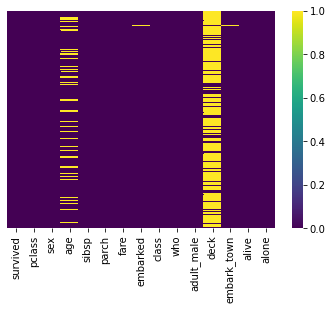

In [13]:
# let's plot all the null values

sns.heatmap(df.isnull(),cmap="viridis",yticklabels=False)

* As we can see majority of the data is missing at age and deck features. Now let's try fill those na values with some meaningful data.

#### 1. Missing completely at Random (MCAR) : 
	  A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR,there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systemmatic going on that makes some data more likely to be missing than other.

In [14]:
# best example for MCAR

df["embark_town"].isnull().sum()

2

#### 2. Missing data Not at random ( MNAR) : 
    Systemmatic missing values. There is absolutely some relationship between data missing and any other values, observed or missing, within the dataset.

In [15]:
#  best example for MNAR

df["deck_mod"] = np.where(df["deck"].isnull(),1,0)

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_mod
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


* We can see that we have created an extra feature by filling the nan value record with 1 and other records with 0's


In [17]:
# grouping data by survived column

df.groupby("survived")["deck_mod"].mean()

survived
0    0.877960
1    0.602339
Name: deck_mod, dtype: float64

* From the results we can see that the survived mean is 0.6  or 60%  and non survived mean is 0.8 or 80%.

#### 3. Missing data at random (MAR) :

Best examples are 

* men --- hide their salaries
* women --- hide their age

## BEST   TECHNIQUES  TO  HANDLE  MISSING  VALUES :-
  1. Mean / Median / Mode replacement
  2. Random Sample Imputation
  3. Capturing NAN Values witha a new feature
  4. End of Distribution Imputation
  5. Arbitary Imputation
  6. Frequent categories Imputation.
  
### 1. MEAN / MEDIAN / MODE REPLACEMENT  TECHNIQUE :
    Mean / Median Replacement technique has a assumption that the data is missing completely at random(MCAR). We solve this replacing with NAN with the most frequent occurance of variables. 

In [18]:
# finding percentage of null values present in age column

df["age"].isnull().mean()

0.19865319865319866

* 19% of the data is missing in age column.

In [19]:
# function to replace the null values with median

def impute_null(df,feature,median):
    df[feature+"_mod"] =df[feature].fillna(median)

In [20]:
# calculating meadian

median = df["age"].median()
median

28.0

In [21]:
# callling impute_null function

impute_null(df,"age",median)

In [22]:
 
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'deck_mod', 'age_mod'],
      dtype='object')

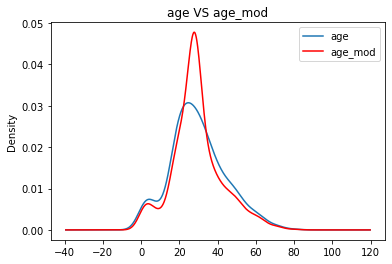

In [23]:
# plotting the age and age_mod columns 

plt.title("age VS age_mod")
df["age"].plot(kind="kde",label="age")
df["age_mod"].plot(kind="kde",color="red",label="age_mod")
plt.legend()

* we mostly use median to fill the na values because by using mean we may get outliers.
* As we can see above the age_mod line is highly distorted.
*  Advantages : 
   1. Easy to implement (robust to outliers).
   2. Faster way to obtain the complete dataset.
* Disadvantages : 
  1. Change or distortion of original variance.
  2. It impacts correlation.
  
### 2. RANDOM SAMPLE IMPUTATION :
* It is same as mean / median imputation but only the difference is it consists of taking random observations from the dataset   and we use this observation to replace the nan values.
* when should it be used ? --> It assumes that the data are missing completely at random(MCAR).

In [24]:
# drop the age_mod column which has been added in the previous technique

df.drop("age_mod",axis=1,inplace=True)

In [25]:
# considering only thrre features i.e. age,fare,survived

samp_df = df[["age","fare","survived"]]

In [26]:
samp_df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [27]:
samp_df.isnull().mean()

age         0.198653
fare        0.000000
survived    0.000000
dtype: float64

In [28]:
# getting random sample by droping the null values 

samp_df["age"].dropna().sample()

135    23.0
Name: age, dtype: float64

In [29]:
# by passing random_state =0 we will get same random value

samp_df["age"].dropna().sample(random_state=0)

423    28.0
Name: age, dtype: float64

In [30]:
# finding sum of null values

samp_df["age"].isnull().sum()

177

In [31]:
# getting 177 random values 

samp_df["age"].dropna().sample(df["age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: age, Length: 177, dtype: float64

In [32]:
# function for random sample imputation

def random_sample(df,feature,median):
    df[feature+"_mode"] = df[feature].fillna(median)
    df[feature+"_random"] = df[feature]
    
    # it will have the random sample to fillna
    random_sample= samp_df["age"].dropna().sample(df["age"].isnull().sum(),random_state=0)
    
    #pandas need same index values to merge data
    random_sample.index = df[df["age"].isnull()].index
    
    df.loc[df[feature].isnull(),feature+"_random"] = random_sample
    

In [33]:
median = df["age"].median()
median

28.0

In [34]:
random_sample(df,"age",median)

In [35]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_mod,age_mode,age_random
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,35.0,35.0


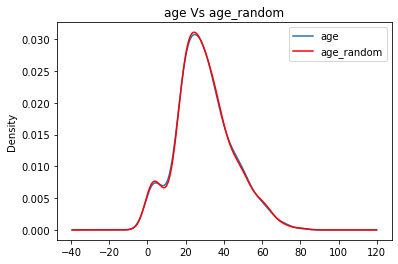

In [36]:
# plotting the age_random column and age column

plt.title("age Vs age_random")
df.age.plot(kind="kde",label="age")
df.age_random.plot(kind="kde",label="age_random",color="red")
plt.legend()

* Advantages :
	1. Easy to implement
	2. No distortion in variance
* Disadvantages :
	1. In every situation randomness may not work.
    
### 3. CAPTURING  NAN  VALUES  WITH  A  NEW  FEATURE:
 * It works well if the data are not missing completely in random

In [37]:
df = sns.load_dataset("titanic")

df["age_nan"] = np.where(df["age"].isnull(),1,0)

In [38]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_nan
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [39]:
# now we can fill na values with mean, median or mode and etc, by creating that extra feature, our model will learn
# some other new insights

# filling na values with mean / median

df["age"].fillna(df["age"].median,inplace=True)

In [40]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_nan
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


* Advantages : 
	1. It is easy to implement
	2. Capture the importance of missing values.
* Disadvantage :
	1. It's additionally creates extra features which may lead to curse of dimentionality.


### 4. END OF DISTRIBUTION IMPUTATION :
 * If there is suspicious that the missing value is not at random the capturing that information is important. In this section onw would want to replace missing data with values that are the tails of the distribution of the variable. 

In [41]:
df= sns.load_dataset("titanic")

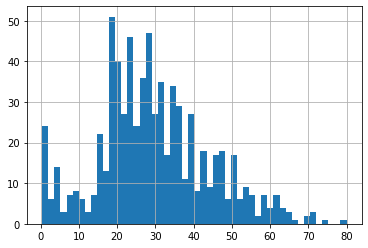

In [42]:
df["age"].hist(bins=50)

* In this particular technique we are going to select the end values that means the values after 3rd standard distribution.


In [43]:
df.age.mean()

29.69911764705882

In [44]:
# formula to calculate 3rd standard normal distribution (extreme value )

df.age.mean()+3*df.age.std()

73.27860964406095

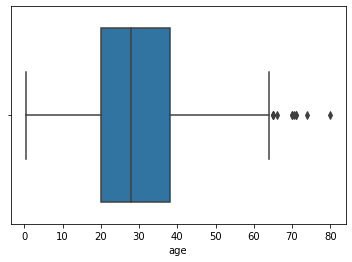

In [45]:
# checking outliers

sns.boxplot("age",data=df)

In [46]:
# function to implement end of distribution imputation technique

def  end_tech(df,feature,extreme,median):
    df[feature+"_end_distribution"] = df[feature].fillna(extreme)
    df[feature] = df[feature].fillna(median)

In [47]:
median = df.age.median()
extreme = df.age.mean()+3*df.age.std()

In [48]:
end_tech(df,"age",extreme,median)

In [49]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_end_distribution
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0


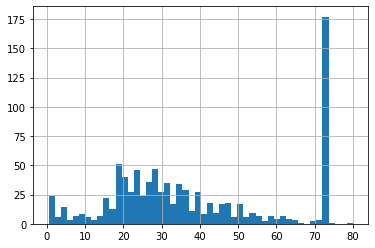

In [50]:
# plotting histogram of newly created feature

df["age_end_distribution"].hist(bins=50)

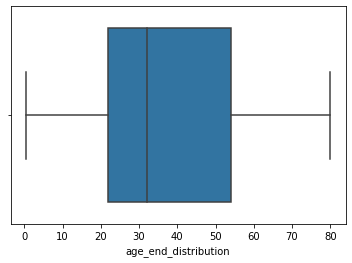

In [51]:
# boxplot representing the newly created feature

sns.boxplot("age_end_distribution",data=df)

* Notice that the outliers also got removed.

* Advantages :
	1. Easy to implement
	2. Captures the importance of missingness if there is one

* Disadvantages :
	1. Distorts the original distributiion of the variable
	2. If missingness is not important, it may mask the predictive power of the original variable by distorting it's distribution.
	3. If the number of NA is big, it will mask the ouliers in the distribution.
	4. If the number of NA is small, the replace NA may be considered an outlier and pre-processed in a subsequent stages in feature engineering.
    
### 5. ARBITRARY VALUE IMPUTATION :
   * It consists of replacing NAN by an arbitrary value.
   * This technique is derived from kaggle competetion.

In [52]:
df = sns.load_dataset("titanic")

In [53]:
# function to impute arbitrary values

def impute_null(df,feature):
    df[feature+"_zeroes"]=df[feature].fillna(0)
    df[feature+"_hundred"]=df[feature].fillna(100)

In [54]:
impute_null(df,"age")

In [55]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_zeroes,age_hundred
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0


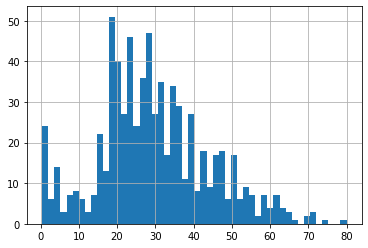

In [56]:
df.age.hist(bins=50)

* it's a rarely used one, juts browse google for knowing advantages and disadvatages
* All the techniques above discussed are used to deal with continuous data.

## HANDLING CATEGORICAL DATA  (MISSING DATA)
###  1. FREQUENT CATEGORY IMPUTATION :


In [57]:
loan  = pd.read_csv("Downloads/loan.csv")

In [58]:
loan.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [59]:
samp_df = loan[['BsmtQual','FireplaceQu','GarageType','SalePrice']]

In [60]:
samp_df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [61]:
samp_df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [62]:
samp_df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [63]:
# counting the frequency of data in variables

samp_df.groupby("BsmtQual")["BsmtQual"].count().sort_values(ascending=False)

# samp_df["BsmtQual"].value_counts()    --- (another way of finding the frequency of variables.)

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

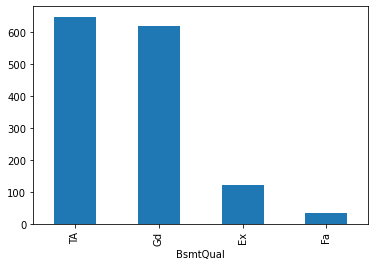

In [64]:
# we can also plot the same above information using bar plot

samp_df.groupby("BsmtQual")["BsmtQual"].count().sort_values(ascending=False).plot.bar()

# samp_df["BsmtQual"].value_counts().plot.bar()   ---> can be used to plot the same plot (below one)

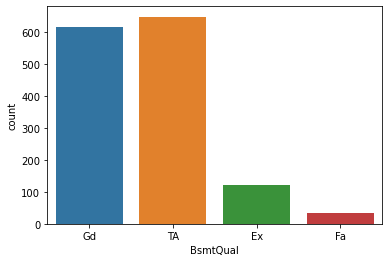

In [65]:
# plotting the same plot using the count plot
sns.countplot(samp_df["BsmtQual"])

In [66]:
print(samp_df["GarageType"].value_counts())
print()
print("Top frequency data is : ",samp_df["GarageType"].value_counts().index[0])

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Top frequency data is :  Attchd


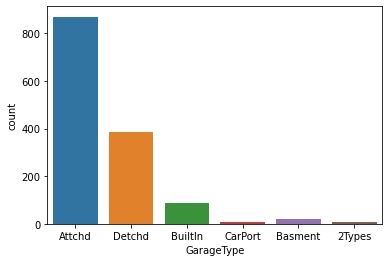

In [67]:
# In the same way now let's count the frequency for the remaining columns

sns.countplot(samp_df["GarageType"])

In [68]:
print(samp_df["FireplaceQu"].value_counts())
print()
print("Top frequency data is : ",samp_df["FireplaceQu"].value_counts().index[0])

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

Top frequency data is :  Gd


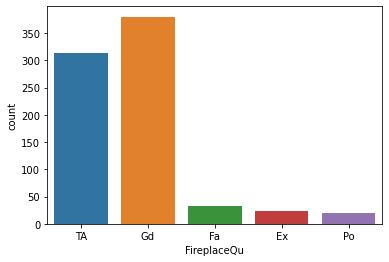

In [69]:
sns.countplot(samp_df["FireplaceQu"])

In [70]:
# functio to replace null values with most frequent data

def impute_null(df,feature):
    data = df[feature].value_counts().index[0]
    df[feature+"_mod"] = df[feature].fillna(data)

In [71]:
for feature in ["BsmtQual",'FireplaceQu','GarageType']:
    impute_null(samp_df,feature)

In [72]:
samp_df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_mod,FireplaceQu_mod,GarageType_mod
0,Gd,NaN,Attchd,208500,Gd,Gd,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


* Advantages :
	1. Easy to implement.
	2. fater way to implement.
* Disadvanatges:
	1. Since we are using the more frequent labels,it may use them in an over represented way, If there are many nan's
	2. It distorts the relation of the most frequent label.
    
> ##### Without coding above code, we can simply use mode function to know most frequent data in a variable.

## 2. ADDING A NEW FEATURE TO CAPTURE NAN VALUES :

In [73]:
samp_df = loan[['BsmtQual','FireplaceQu','GarageType','SalePrice']]

In [74]:
# filling nan values in BsmtQual using np.where function

samp_df["BsmtQual_var"] = np.where(samp_df["BsmtQual"].isnull(),1,0)

In [75]:
frequent_data = samp_df["BsmtQual"].mode()[0]

samp_df["BsmtQual"].mode()

0    TA
dtype: object

In [76]:
samp_df["BsmtQual"].fillna(frequent_data,inplace=True)

In [77]:
samp_df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [78]:
samp_df["FireplaceQu_var"] = np.where(samp_df["FireplaceQu"].isnull(),1,0)

In [79]:
frequent_data = samp_df["FireplaceQu"].mode()[0]
samp_df["FireplaceQu"].fillna(frequent_data,inplace=True)
samp_df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


* Advantages :
	1. Easy to implement.

* Disadvantages :
	1. It creates more number of extra features


#### Suppose, if we have more frequent categories, we just replace NAN with a new Category.

In [80]:
samp_df = loan[['BsmtQual','FireplaceQu','GarageType','SalePrice']]

In [81]:
# function to create a new variable

def impute_null(df,feature):
    df[feature+"_new"] =np.where(df[feature].isnull(),"Missing",df[feature])

In [82]:
for feature in ["BsmtQual",'FireplaceQu','GarageType']:
    impute_null(samp_df,feature)

In [83]:
samp_df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new,FireplaceQu_new,GarageType_new
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


# HANDLING   CATEGORICAL DATA  (ENCODING TECHNIQUES)
## 1. ONE HOT ENCODING TECHNIQUE :-

In [84]:
df = sns.load_dataset("titanic")

In [85]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [86]:
# get dummies method in pandas is used for one hot encoding 

pd.get_dummies(df["sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [87]:
# Actually we dont't need two columns, we can refer both female and male with the help of only one column .
# For example let's consider female column, in that 1 represents female and 0 represents 1  ( so  now we can remove male column)

pd.get_dummies(df["sex"],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [88]:
# encoding of embarked feature
pd.get_dummies(df['embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [89]:
# dropping the first column after encoding embarked

pd.get_dummies(df['embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [90]:
benz = pd.read_csv("Downloads/mercedes.csv",usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [91]:
benz.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [92]:
benz["X0"].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

##### Performing one hot encoding to the above feature make create a lot of new features, So in order to overcome this type of problem let's do encoding for top 10 values and group all the remaining values into a single column (KDD orange cup Challenge)

In [93]:
# top_10 values in X1

top_10 = benz["X1"].value_counts().sort_values(ascending=False).head(10).index


In [94]:
top_10

# converting top_10 into list

top_10 = list(top_10)
top_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [95]:
benz.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [96]:
# encoding technique

for feature in top_10:
    benz[feature] = np.where(benz["X1"]==feature,1,0)

In [97]:
top_10.append("X1")

In [98]:
benz[top_10].head()

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v


## 2. ORDINAL  NUMBER  ENCODING :-
* Best example - Grading system.
* ranking a batsman based on thier experience 
* ranking days based on the interest.


In [99]:
import datetime

In [100]:
# getting today date

today = datetime.datetime.today()
today

datetime.datetime(2021, 2, 9, 12, 33, 31, 272965)

> timedelta function is used to subtract the number of days from a given date.

In [101]:
# getting yesterday date

today-datetime.timedelta(1)

datetime.datetime(2021, 2, 8, 12, 33, 31, 272965)

In [102]:
#getting day before's date

today-datetime.timedelta(2)

datetime.datetime(2021, 2, 7, 12, 33, 31, 272965)

In [103]:
### So in a similar way let's try to get previous 15 days date using list comprehensions

days = [today-datetime.timedelta(x) for x in range(15)]

days

[datetime.datetime(2021, 2, 9, 12, 33, 31, 272965),
 datetime.datetime(2021, 2, 8, 12, 33, 31, 272965),
 datetime.datetime(2021, 2, 7, 12, 33, 31, 272965),
 datetime.datetime(2021, 2, 6, 12, 33, 31, 272965),
 datetime.datetime(2021, 2, 5, 12, 33, 31, 272965),
 datetime.datetime(2021, 2, 4, 12, 33, 31, 272965),
 datetime.datetime(2021, 2, 3, 12, 33, 31, 272965),
 datetime.datetime(2021, 2, 2, 12, 33, 31, 272965),
 datetime.datetime(2021, 2, 1, 12, 33, 31, 272965),
 datetime.datetime(2021, 1, 31, 12, 33, 31, 272965),
 datetime.datetime(2021, 1, 30, 12, 33, 31, 272965),
 datetime.datetime(2021, 1, 29, 12, 33, 31, 272965),
 datetime.datetime(2021, 1, 28, 12, 33, 31, 272965),
 datetime.datetime(2021, 1, 27, 12, 33, 31, 272965),
 datetime.datetime(2021, 1, 26, 12, 33, 31, 272965)]

In [104]:
### now let's convert the days into pandas dataframe

days = pd.DataFrame(days)
days.columns=["Day"]

In [105]:
days.head()

,Day
0,2021-02-09 12:33:31.272965
1,2021-02-08 12:33:31.272965
2,2021-02-07 12:33:31.272965
3,2021-02-06 12:33:31.272965
4,2021-02-05 12:33:31.272965


In [106]:
# getting week names from the days

days["Day"].dt.day_name()

0       Tuesday
1        Monday
2        Sunday
3      Saturday
4        Friday
5      Thursday
6     Wednesday
7       Tuesday
8        Monday
9        Sunday
10     Saturday
11       Friday
12     Thursday
13    Wednesday
14      Tuesday
Name: Day, dtype: object

In [107]:
# getting year from the date

days["Day"].dt.year.head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: Day, dtype: int64

In [108]:
# getting month from the date

days["Day"].dt.month.head()

0    2
1    2
2    2
3    2
4    2
Name: Day, dtype: int64

In [109]:
# adding extra feature namely called as weekday

days["weekday"] = days["Day"].dt.day_name()
days.head()

,Day,weekday
0,2021-02-09 12:33:31.272965,Tuesday
1,2021-02-08 12:33:31.272965,Monday
2,2021-02-07 12:33:31.272965,Sunday
3,2021-02-06 12:33:31.272965,Saturday
4,2021-02-05 12:33:31.272965,Friday


In [110]:
days["Day"].dt.day_name().unique()

array(['Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday', 'Thursday',
       'Wednesday'], dtype=object)

In [111]:
dict1 = dict(zip(['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],[1,2,3,4,5,6,7]))

dict1

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [112]:
days["weekday_ordinal"] = days["weekday"].map(dict1)

In [113]:
days.head()

,Day,weekday,weekday_ordinal
0,2021-02-09 12:33:31.272965,Tuesday,2
1,2021-02-08 12:33:31.272965,Monday,1
2,2021-02-07 12:33:31.272965,Sunday,7
3,2021-02-06 12:33:31.272965,Saturday,6
4,2021-02-05 12:33:31.272965,Friday,5


## 3. COUNT OF FREQUENCY ENCODING :-

In [114]:
# we will consider titanic dataset for this technique

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [115]:
use_cols = ["sex","class","embark_town"]

samp_df = df[use_cols]

samp_df.head()

,sex,class,embark_town
0,male,Third,Southampton
1,female,First,Cherbourg
2,female,Third,Southampton
3,female,First,Southampton
4,male,Third,Southampton


In [116]:
# this is similar to one hot encoding, but only the difference is the instead of assing intergers in order we will replacing
# the value with their frequency.


### We will using the last embark_town column for count of frequency method

samp_df["embark_town"].value_counts()


Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [117]:
# let's convert the value_counts into a dictionary

samp_dict = samp_df["embark_town"].value_counts().to_dict()
samp_dict

{'Southampton': 644, 'Cherbourg': 168, 'Queenstown': 77}

In [118]:
# now let's replace or map the frequency values with the dictionary

samp_df["embark_town"] = samp_df["embark_town"].map(samp_dict)

samp_df.head()

,sex,class,embark_town
0,male,Third,644.0
1,female,First,168.0
2,female,Third,644.0
3,female,First,644.0
4,male,Third,644.0


* Advantages :
	1. Easy to use
	2. We are not increasing any feature space.
* Disadvantages :
	1. It will provide the same weight if the frequencies are same.


## 4. TARGET GUIDED ORDINAL ENCODING :-
    1. We will be ordering the labels according to the target.
    2. Replace the labels by the joint probability of being 1 or 0.

In [119]:
# For this encoding technique also we will be using titanic dataset

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [120]:
samp_df = df[["deck","sex","embarked","survived"]]

In [121]:
samp_df.head()

,deck,sex,embarked,survived
0,NaN,male,S,0
1,C,female,C,1
2,NaN,female,S,1
3,C,female,S,1
4,NaN,male,S,0


In [122]:
samp_df["deck"].isnull().sum()

688

In [123]:
# now let's fill those nan values with some alphabet

samp_df["deck"]=samp_df.astype(object).fillna("M")

samp_df.head()

,deck,sex,embarked,survived
0,M,male,S,0
1,C,female,C,1
2,M,female,S,1
3,C,female,S,1
4,M,male,S,0


In [124]:
samp_df["deck"].value_counts()

M    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64

In [125]:
## Now let's find the mean of each label based on survived column

samp_df.groupby("deck")["survived"].mean()

deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299419
Name: survived, dtype: float64

In [126]:
# find the indexes of labels by sorting the means

labels = samp_df.groupby("deck")["survived"].mean().sort_values().index
labels

Index(['M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='deck')

In [127]:
# creating a dictionary  assing some ranks to the labels based on their mean 

dict_labels = {k:i for i,k in enumerate(labels,0)}

dict_labels

{'M': 0, 'A': 1, 'G': 2, 'C': 3, 'F': 4, 'B': 5, 'E': 6, 'D': 7}

In [128]:
# map the dict with the deck

samp_df["ordinal_deck"] = samp_df["deck"].map(dict_labels)

In [129]:
samp_df.head()

,deck,sex,embarked,survived,ordinal_deck
0,M,male,S,0,0
1,C,female,C,1,3
2,M,female,S,1,0
3,C,female,S,1,3
4,M,male,S,0,0


## 5. MEAN ENCODING :

* Advantages :
	1. It captures information within the label, rendering more predictive features
	2. It created monotomic relationship between variable and target.
* Disadvantages : 
	1. It may prone to overfitting.

In [130]:
samp_df.groupby("deck")["survived"].mean()

deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299419
Name: survived, dtype: float64

In [131]:
# convert the above one into dictionary

mean_dict = samp_df.groupby("deck")["survived"].mean().to_dict()

In [132]:
samp_df["ordinal_mean"] = samp_df["deck"].map(mean_dict)

In [133]:
samp_df.head()

,deck,sex,embarked,survived,ordinal_deck,ordinal_mean
0,M,male,S,0,0,0.299419
1,C,female,C,1,3,0.593220
2,M,female,S,1,0,0.299419
3,C,female,S,1,3,0.593220
4,M,male,S,0,0,0.299419


In [134]:
# Now we can remove the dec column

samp_df.drop(["deck"],axis=1,inplace=True)

In [135]:
samp_df.head()

,sex,embarked,survived,ordinal_deck,ordinal_mean
0,male,S,0,0,0.299419
1,female,C,1,3,0.593220
2,female,S,1,0,0.299419
3,female,S,1,3,0.593220
4,male,S,0,0,0.299419


## 6. PROBABILITY  RATIO  ENCODING :-
  1. Probability of survived based on deck -- categorical feature
  2. Probability of Not survived           -- 1-pr(survived)
  3. pr(survived)/pr(Not survived).
  4. Dictionary to map cabin with probability.
  5. Replace with the categorical feature.

In [136]:
# considering only two features from titanic dataset

samp_df = df[["deck","survived"]]

In [137]:
samp_df.head()

,deck,survived
0,NaN,0
1,C,1
2,NaN,1
3,C,1
4,NaN,0


In [138]:
# fillna with "M" 

samp_df["deck"]=samp_df["deck"].astype(object).fillna("M")

In [139]:
samp_df.head()

,deck,survived
0,M,0
1,C,1
2,M,1
3,C,1
4,M,0


In [140]:
# now let's encode the categories with their means

mean_dict = samp_df.groupby("deck")["survived"].mean()
mean_dict

deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299419
Name: survived, dtype: float64

In [141]:
# convert the dictionary into a dataframe

prob_df = pd.DataFrame(mean_dict)

prob_df.head()

,survived
deck,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000


In [142]:
## With the help of above code we got to know the probability of survived column
## So with the help of that column, let's calculate the probability of died

prob_df["died"]=1-prob_df["survived"]

In [143]:
prob_df.head()

,survived,died
deck,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [144]:
# And the final step in this technique is finding the ration and replace those with the categories

prob_df["ratio"] = prob_df["survived"]/prob_df["died"]

In [145]:
prob_df.head()

,survived,died,ratio
deck,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [146]:
probability_encoded = prob_df["ratio"].to_dict()

In [147]:
# Replacing the categorical values with ratios

samp_df["probability_ration"] = samp_df["deck"].map(probability_encoded)

In [148]:
samp_df.head()

,deck,survived,probability_ration
0,M,0,0.427386
1,C,1,1.458333
2,M,1,0.427386
3,C,1,1.458333
4,M,0,0.427386


# STANDARDIZATION  AND  NORMALIZATION  TECHNIQUES :-

##### WHY TRANSFORMATION  OF   FEATURES  ARE  REQUIRED : 
   1. Linear regression -- Gradient Descent -- Global Minima
   2. Algorithms like KNN, K means, Hierarichal clustering -- All these algorithms works on euclidian distance.
   3. We don't need to use transformation in decision trees, random forest and xgboost and etc.
   4. In Deep Learning we will using transformation and scalling techniques in concepts such as.
      1. ANN  -- Global Minima, Gradient Descent.
      2. CNN 
      3. RNN

#### TECHNIQUES THAT ARE GOING TO BE DISCUSSED IN THIS NOTEBOOK :-
   1. Normalization and Standadization 
   2. Scaling to mininum and Maximum values.
   3. Scaling to meadian and Qunatities.
   4. Guassian Transformation 
      1. Logarithmic transformation.
      2. Reciprocal Transformation.
      3. Square root Transformation.
      4. Explonential Transformation 
      5. Box Cox Transformation.
   
## 1. STANDARDIZATION (Z - SCORE  NORMALIZATION) : 
   * Most often, normalization refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling. Using standardization, we center the feature columns at mean 0 with standard deviation 1 so that the feature columns take the form of a normal distribution, which makes it easier to learn the weights. Standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling.
   * StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values.
   * Formula to compute standardization --:  z =(x-x_mean)/std

In [149]:
# importing dataset 

df = sns.load_dataset("titanic")

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [150]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [151]:
# fll all the null values in age column


df["age"].fillna(df["age"].median(),inplace=True)


In [152]:
df = df[["age","fare","survived"]]

df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [153]:
### Standardization : we use the standardscalar from sklearn Library

#importing standardscalar

from sklearn.preprocessing import StandardScaler 

In [154]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

In [155]:
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()

,age,fare,survived
0,-0.565736,-0.502445,-0.789272
1,0.663861,0.786845,1.266990
2,-0.258337,-0.488854,1.266990
3,0.433312,0.420730,1.266990
4,0.433312,-0.486337,-0.789272


* 0th column is the standardized value for age
* 1th column is the standardized value for fare
* 2nd column is the standardized value for survived column
* Standardization will be performed on column / feature wise

> ### fit_transform() --> apply algorithm and change the data ( data change happening)
> ### fit()        --- used for training ML models 

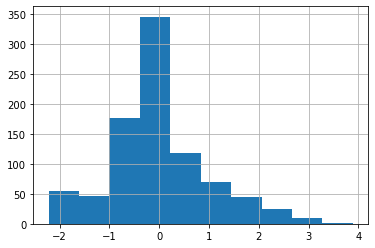

In [156]:
## plotting age feature

df_scaled["age"].hist()

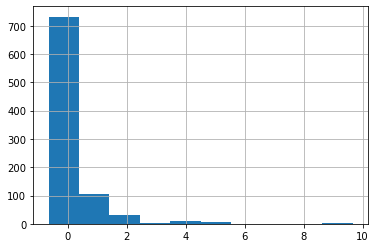

In [157]:
## plotting fare feature

df_scaled["fare"].hist()

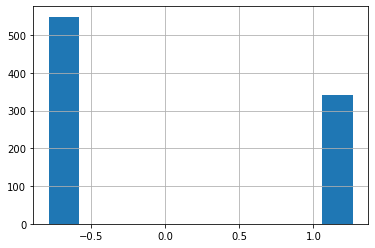

In [158]:
## plotting survived feature

df_scaled["survived"].hist()

## 2. MIN  MAX  SCALLING :-
   * In this we subtract the Minimum from all values – thereby marking a scale from Min to Max. Then divide it by the difference between Min and Max. The result is that our values will go from zero to 1. This is quite acceptable in cases where we are not concerned about the standardisation along the variance axes. e.g. image processing or neural networks expecting values between 0 to 1.
   * The downside however is that because we have now bounded the range from 0 to 1, we will have lower standard deviations and it suppresses the effect of outliers.
   * For most cases StandardScaler would do no harm. Especially when dealing with variance (PCA, clustering, logistic regression, SVMs, perceptrons, neural networks) in fact Standard Scaler would be very important. On the other hand it will not make much of a difference if you are using tree based classifiers or regressors. 
   * Formula = (X-X.min/(X.max-X.min))

In [159]:
# importing MinMaxScaler from sklearn

from sklearn.preprocessing import MinMaxScaler

In [160]:
# creating object from minmaxscaler

min_max = MinMaxScaler()

df_minmax = pd.DataFrame(min_max.fit_transform(df),columns=df.columns)

In [161]:
df_minmax.head()

,age,fare,survived
0,0.271174,0.014151,0.0
1,0.472229,0.139136,1.0
2,0.321438,0.015469,1.0
3,0.434531,0.103644,1.0
4,0.434531,0.015713,0.0


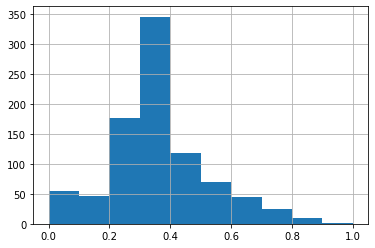

In [162]:
## plotting the "age" feature

df_minmax["age"].hist()
plt.show()

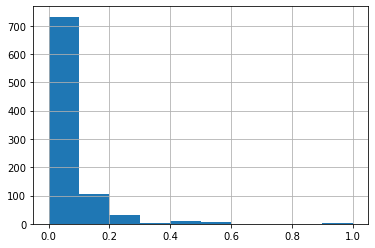

In [163]:
## plotting the "fare" feature

df_minmax["fare"].hist()
plt.show()

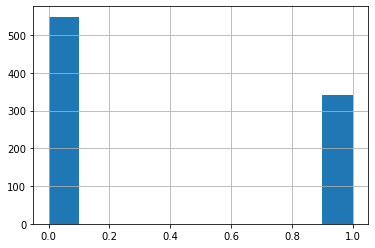

In [164]:
## plotting the "survived" feature

df_minmax["survived"].hist()
plt.show()

## 3. ROBUST  SCALAR :
   * By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset.
   * It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range.
   * The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance.
   * RobustScaler uses the interquartile range so that it is robust to outliers. 
   * X_Scaled = (X-X.median)/IQR

In [165]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust.head()

,age,fare,survived
0,-0.461538,-0.312011,0.0
1,0.769231,2.461242,1.0
2,-0.153846,-0.282777,1.0
3,0.538462,1.673732,1.0
4,0.538462,-0.277363,0.0


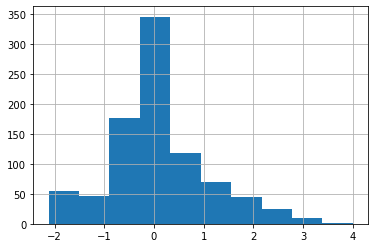

In [166]:
## plotting the "age" feature

df_robust["age"].hist()
plt.show()

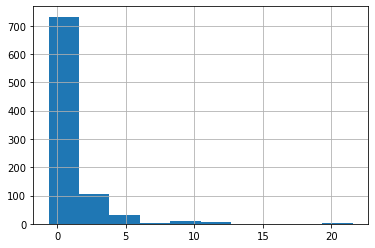

In [167]:
## plotting the "fare" feature

df_robust["fare"].hist()
plt.show()

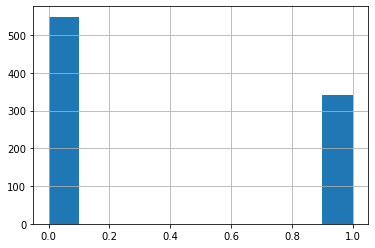

In [168]:
## plotting the "survived" feature

df_robust["survived"].hist()
plt.show()

> It is more robust to outliers

## 4. GAUSSIAN  TRANSFORMATION :
   * Some ML algorithms like linear and logistic assume that the features are normally distributed.
   * Normally distributed model increases accuracy and performance
   * We can apply guassian transformation to convert the distribution of data into normal distribution.
   * These are the different types of techniques :
     1. Logarithimc transformation 
     2. Reciprocal Transformation
     3. Square root transformation
     4. Explonential transformation (more generalm you can use any exponent)
     5. Box Cox transformation.

In [169]:
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [170]:
df.isnull().sum()

age         0
fare        0
survived    0
dtype: int64

In [171]:
import scipy.stats as stat
import pylab

In [172]:
### if we want to check whether a feature is guassian distributed or normal distributed we use 
### Q-Q plot for plotting

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist ="norm",plot=pylab)
    plt.show()

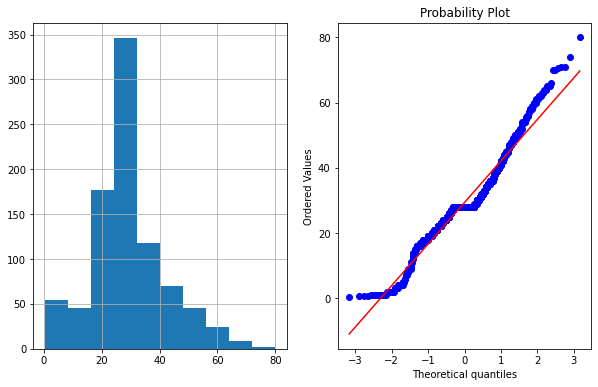

In [173]:
plot_data(df,"age")

### LOGARITHMIC TRANSFORMATION 
* logarithimic transformaton better works when data is right skewed or left skewed

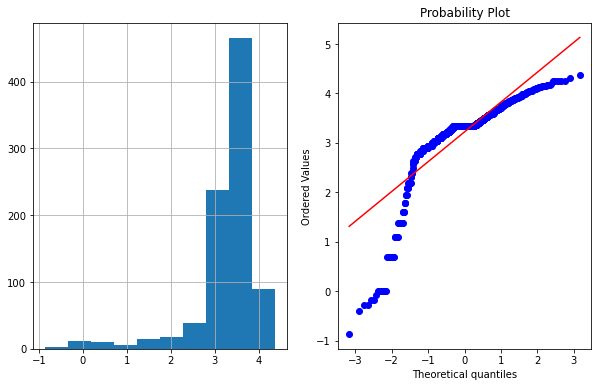

In [174]:
df["age_log"]=np.log(df["age"])
plot_data(df,"age_log")

### RECIPROCAL TRANSFORMATION :


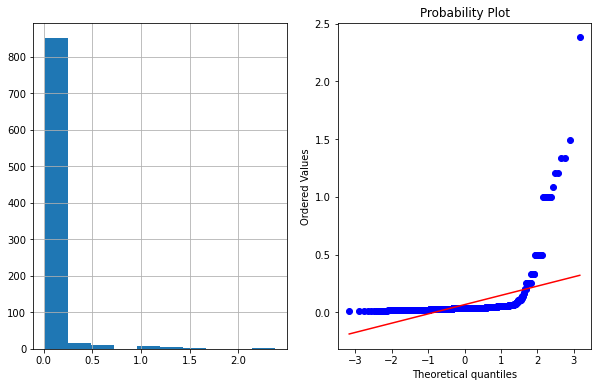

In [175]:
df["age_recip"]=1/df["age"]
plot_data(df,"age_recip")

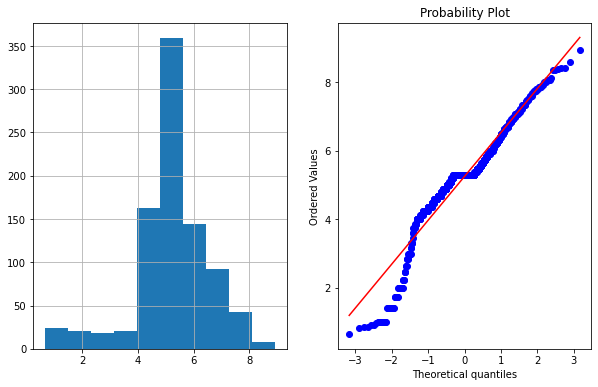

In [176]:
### square root transformation 

df["age_square"]= df["age"]**(1/2)
plot_data(df,"age_square")

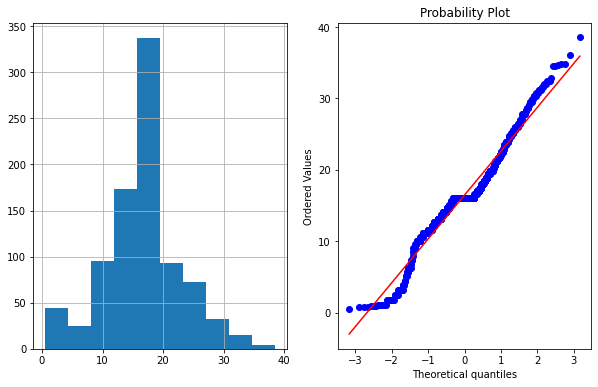

In [177]:
### exponential transformation 

df["age_exp"]=df['age']**(1/1.2)
plot_data(df,"age_exp")

## BoxCox  Transformation :


In [178]:
stat.boxcox(df["age"])

(array([13.468119  , 21.4987284 , 15.56341683, 20.05611014, 20.05611014,
        16.58601436, 28.84746463,  0.92513402, 16.07664335,  9.01695462,
         2.53193075, 30.6104327 , 12.39181078, 21.97437834,  9.01695462,
        29.29062758,  0.92513402, 16.58601436, 18.09258499, 16.58601436,
        20.05611014, 19.56971919,  9.59722218, 16.58601436,  5.32265694,
        21.4987284 , 16.58601436, 11.84551333, 16.58601436, 16.58601436,
        22.44755196, 16.58601436, 16.58601436, 34.06447944, 16.58601436,
        23.38676361, 16.58601436, 12.93257404, 11.29332892,  9.01695462,
        22.44755196, 16.07664335, 16.58601436,  1.75636071, 11.84551333,
        16.58601436, 16.58601436, 16.58601436, 16.58601436, 11.29332892,
         4.65897047, 12.93257404, 26.60575762, 17.09169505, 33.6375945 ,
        16.58601436, 12.93257404, 16.83930618,  3.26857952,  7.221786  ,
        13.468119  , 21.4987284 , 24.77874367,  2.53193075, 16.58601436,
        16.58601436, 17.09169505, 11.84551333, 10.7

In [179]:
df["age_boxcox"],parameters=stat.boxcox(df["age"])

In [180]:
print(parameters)

0.7964531473656952


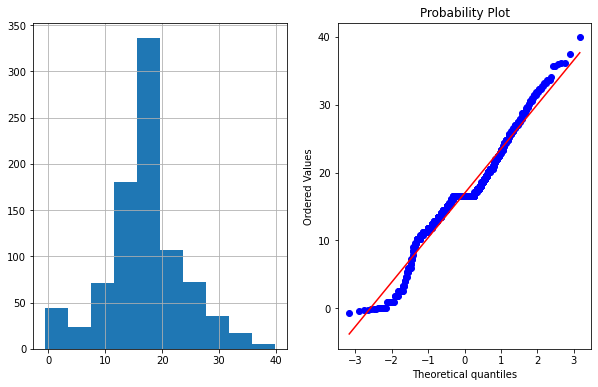

In [181]:
plot_data(df,"age_boxcox")